In [ ]:
import pandas as pd


pd.read_csv

In [ ]:
from statsmodels.api import OLS
?OLS

In [ ]:
from InternationalityCalculations import CalculateEverything
from InternationalityCalculations import DB_joinJournals

CalculateEverything('globalization_TOP_NOLIMIT.csv','TOP',excludeMultiDiscipline=False)
CalculateEverything('globalization_TOP_BROADLIMIT.csv','TOP',excludeMultiDiscipline='broad')
CalculateEverything('globalization_TOP_NARROWLIMIT.csv','TOP',excludeMultiDiscipline='narrow')

In [2]:
import pandas as pd

df = pd.DataFrame({
    'nolimit':pd.read_csv('DisciplineRobustness/globalization_TOP_NOLIMIT.csv',index_col=['Period','Method','Field','Country']).Internationality,
    'broadlimit': pd.read_csv('DisciplineRobustness/globalization_TOP_BROADLIMIT.csv',index_col=['Period','Method','Field','Country']).Internationality,
    'narrowlimit': pd.read_csv('DisciplineRobustness/globalization_TOP_NARROWLIMIT.csv',index_col=['Period','Method','Field','Country']).Internationality
})


In [6]:

df.corr()

,nolimit,broadlimit,narrowlimit
nolimit,1.000000,0.827757,0.775074
broadlimit,0.827757,1.000000,0.919413
narrowlimit,0.775074,0.919413,1.000000


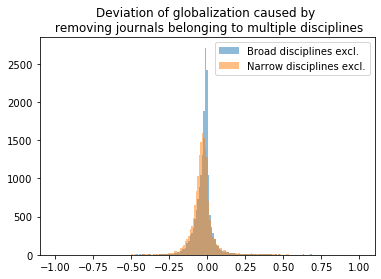

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(-1, 1, 200)

plt.hist((df.nolimit - df.broadlimit), bins, alpha=0.5, label='Broad disciplines excl.')
plt.hist((df.nolimit - df.narrowlimit), bins, alpha=0.5, label='Narrow disciplines excl.')
plt.legend(loc='upper right')
plt.title('Deviation of globalization caused by \n removing journals belonging to multiple disciplines')

plt.show()

In [ ]:
ranks = df.groupby(['Field','Method','Period']).rank()

(ranks.nolimit - ranks.broadlimit).hist(bins=100)

In [ ]:
devs = pd.DataFrame({'broad':(df.nolimit - df.broadlimit),
                     'narrow':(df.nolimit - df.narrowlimit)})
devs[(devs.broad >= -0.15) & (devs.broad <= 0.15)].shape[0]/devs.shape[0]

In [ ]:
from InternationalityData import DB_joinJournals
import pandas as pd
conn = DB_joinJournals()
pd.read_sql_query('''
        SELECT c.name as Country, sum(Articles) as Documents
        FROM ArticleCountries
        inner join countries c on ArticleCountries.FacetID = c.ID
        inner join v_issns i on ArticleCountries.ISSNID = i.ID
        where
            BundleID = {} 
        {}
        group by c.name
        AND
    i.broadFieldsNum = 1
        '''.format(1,'''
'''),conn,index_col='Country')
